# Ley potencial de Stevens para la sonoridad en función del nivel de presión sonora

In [ ]:
import math

Pre = 0.0002 #Presión sonora de referencia en dinas/cm^2

# Datos conocidos
n = 27  # Número de datos
sum_N = 810  # Sumatorio de N
sum_log_L = -8.562  # Sumatorio de log(L)
sum_N_squared = 28800  # Sumatorio de N^2
sum_N_log_L = -124.759  # Sumatorio de N * log(L)

(15.0, 160.0)

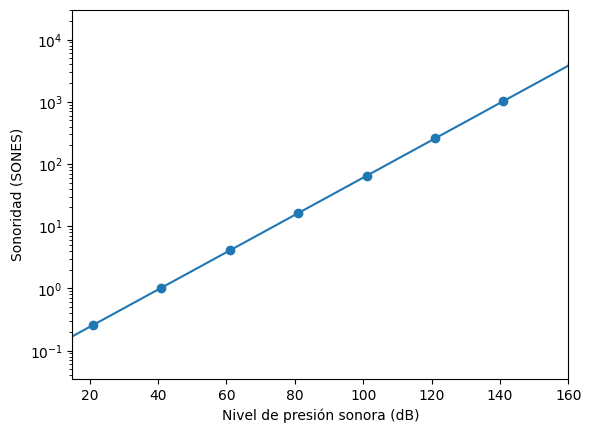

In [ ]:
# Representación gráfica de la Ley potencial de Stevens

decibelios = range(1,200,20)
b = 10 #por ejemplo
a = 0.6 #por ejemplo
Loudness=[]
Loudness = [b * ((Pre * (10**(decibelio/20))) ** a) for decibelio in decibelios] #Aquí se trabaja con el nivel de presión sonora (dB)

import matplotlib.pyplot as plt
plt.plot(decibelios, Loudness, marker='o', linestyle='-')
plt.xlabel('Nivel de presión sonora (dB)')
plt.ylabel('Sonoridad (SONES)')
plt.yscale('log')
plt.xlim(15, 160)

In [ ]:
#Regresión lineal simple:

# Cálculo de la pendiente de la recta de regresión
A = (n * sum_N_log_L - sum_N * sum_log_L) / (n * sum_N_squared - sum_N ** 2)

# Cálculo del intercepto/sesgo/bias de la recta de regresión
B = (sum_log_L/27) - (A*(sum_N/27))

In [ ]:
# Cálculo del exponente de la Ley potencial de Stevens (a)
a = 20*A
print(f"Exponente de Stevens (a): {a:.3f}")

# Cálculo de la constante de la Ley potencial de Stevens (b)
b = (10**B)/(Pre**a)
print(f"Constante de Stevens (b): {b:.3f}")

Exponente de Stevens (a): 0.587
Constante de Stevens (b): 9.418


In [ ]:
# Ejemplo: ¿Cuál será la sonoridad percibida con una presión sonora de 0.06 dinas/cm^2?
p = 0.06
Loudness = b * (p ** a)  # Nivel de presión sonora en dB para p
print(f"Sonoridad (L) para p = {p} dinas/cm^2: {Loudness:.3f} sones")

Sonoridad (L) para p = 0.06 dinas/cm^2: 1.805 sones


Se puede calcular el nivel de presión sonora necesario para percibir el doble de sonoridad despejando de la siguiente ecuación:

\begin{equation}
k \cdot L = b \cdot Pre^a \cdot 10^{a \cdot \frac {  \left(N - D\right) }{20}} \
\end{equation}

Donde:
  
  - k es el incremento o reducción de sonoridad esperado (para duplicar la sonoridad k = 2, si se pretende reducir a la mitad k = 1/2)
  
  - D es el incremento o decremento en el nivel de presión sonora que se necesita para percibir la sonoridad buscada.

  De modo que,

  \begin{equation}
D = \frac {-log_{10} k} { \frac {a} {20} } \\
\end{equation}

In [ ]:
# Calcule el nivel de presión sonora necesario para percibir el doble de sonoridad
k = 2 #el doble de sonoridad
db = 40
D = -(math.log(k,10))/(a/20)
print(f"Nivel de presión sonora necesario para multiplicar por {k} la sonoridad: {db - D:.2f} dB")

Nivel de presión sonora necesario para multiplicar por 2 la sonoridad: 50.25 dB


In [ ]:
# Se puede comprobar evaluando la Ley potencial de Stevens para un nivel de presión sonora de 50.25 y de 40 dB
l_doble = b * ((Pre * (10**((db - D)/20))) ** a)
l = b * ((Pre * (10**(db/20))) ** a)

if round(l*k)==round(l_doble):
  print(f'Has calculado bien el nivel de presión sonora que multiplica por {k} la sonoridad')
else:
  print(f'Has calculado MAL el nivel de presión sonora que multiplica por {k} la sonoridad')

Has calculado bien el nivel de presión sonora que multiplica por 2 la sonoridad


<hr>

Creado por **Sandra Arranz Paraíso** (sandraar@ucm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">